### Early Stopping

In [1]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [2]:
# Scale values ranging from 0-255 to 0-1

train_images = train_images / 255.0
test_images = test_images / 255.0

In [3]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Sequential model with 1 Flatten layer as input, 1 Dense hidden layer with 300 neurons, output dense layer with 10 neurons
# Input shape based on dataset shape
# Flatten = Flattens the multi dimensional tensor as input into single dimension

base_model = Sequential()
base_model.add(Flatten(input_shape=[28, 28]))
base_model.add(Dense(300, activation="relu"))
base_model.add(Dense(10, activation="softmax"))

base_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [5]:
early_stopped_model = Sequential()
early_stopped_model.add(Flatten(input_shape=[28, 28]))
early_stopped_model.add(Dense(300, activation="relu"))
early_stopped_model.add(Dense(10, activation="softmax"))

early_stopped_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

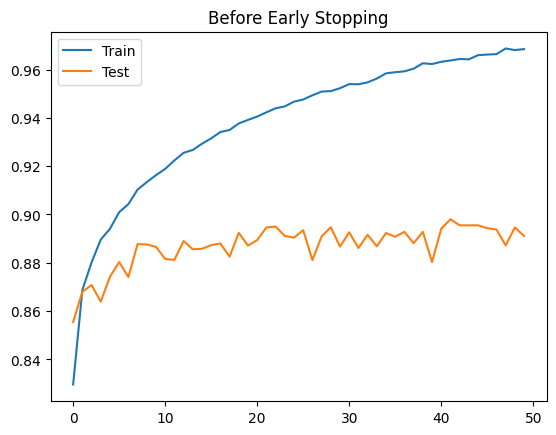

In [6]:
import matplotlib.pyplot as plt

history = base_model.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels), verbose=0)

plt.title("Before Early Stopping")
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Test")
plt.legend()

Epoch 1/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4756 - accuracy: 0.8316 - val_loss: 0.4018 - val_accuracy: 0.8564
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3602 - accuracy: 0.8683 - val_loss: 0.3699 - val_accuracy: 0.8680
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3246 - accuracy: 0.8802 - val_loss: 0.3634 - val_accuracy: 0.8677
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3028 - accuracy: 0.8884 - val_loss: 0.3571 - val_accuracy: 0.8689
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2836 - accuracy: 0.8953 - val_loss: 0.3414 - val_accuracy: 0.8780
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2706 - accuracy: 0.8992 - val_loss: 0.3368 - val_accuracy: 0.8811
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2552 - accuracy: 0.9052 - val_loss: 0.3486 - val_accuracy:

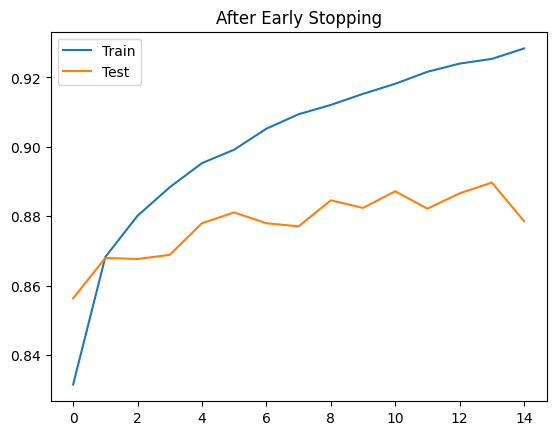

In [7]:
import tensorflow as tf

# Callback for EarlyStopping with patience=4 which is the number of epochs to wait before deciding on early stoppingh
# restore_best_weights if true then selects the best weight or else the final weight

callback = tf.keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)
history = early_stopped_model.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels), callbacks=[callback])

plt.title("After Early Stopping")
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Test")
plt.legend()